In [1]:
import cwru                      # Case Western Reserve University Bearing Data
import pandas as pd              # dataframe
import numpy as np               # array
from collections import Counter  # Class 갯수 세기
import matplotlib.pyplot as plt  # Visualization
%matplotlib inline
from scipy.fftpack import fft, ifft
from acoustics.cepstrum import complex_cepstrum, real_cepstrum
from sklearn.preprocessing import scale
from scipy.spatial import distance
from numpy.linalg import inv

In [2]:
cwru_data = cwru.CWRU("12DriveEndFault", "1750", 12000)

In [3]:
x_train = np.asarray(cwru_data.X_train)
x_test = np.asarray(cwru_data.X_test)

y_train = np.asarray(cwru_data.y_train)
y_test = np.asarray(cwru_data.y_test)

In [4]:
print(Counter(y_train)) # Train 데이터 클래스 분포
print(Counter(y_test))  # Test 데이터 클래스 분포

Counter({15: 30, 0: 7, 1: 7, 2: 7, 3: 7, 4: 7, 5: 7, 6: 7, 7: 7, 8: 7, 9: 7, 10: 7, 11: 7, 12: 7, 13: 7, 14: 7})
Counter({15: 10, 0: 3, 1: 3, 2: 3, 3: 3, 4: 3, 5: 3, 6: 3, 7: 3, 8: 3, 9: 3, 10: 3, 11: 3, 12: 3, 13: 3, 14: 3})


In [5]:
# Normal 클래스
normal_train_idx, = np.where(y_train == 15)   
normal_test_idx, = np.where(y_test == 15)     

# Abnormal 클래스
abnormal_train_idx, = np.where(y_train != 15)
abnormal_test_idx, = np.where(y_test != 15)

In [6]:
# Train 데이터 클래스 수정
for i in range(len(y_train)):
    if i in normal_train_idx:
        y_train[i] = 0 # Normal 클래스
    else:
        y_train[i] = 1 # Abnormal 클래스    
        
# Test 데이터 클래스 수정
for i in range(len(y_test)):
    if i in normal_test_idx:
        y_test[i] = 0 # Normal 클래스
    else:
        y_test[i] = 1 # Abnormal 클래스  

In [7]:
def do_FFT(signal_set):
    window = np.hamming(12000)
    fft_rlt = np.fft.fft(window * signal_set)
    return(fft_rlt)

def do_Cepstrum(spectrum):
    cep_result = (ifft(np.log(spectrum**2))**2).real
    return(cep_result)

    #ifft(np.log(np.abs(spectrum)))

In [8]:
#Data split
normal_x_train = pd.DataFrame(x_train[normal_train_idx])
normal_x_test = pd.DataFrame(x_test[normal_test_idx])

abnormal_x_train = pd.DataFrame(x_train[abnormal_train_idx])
abnormal_x_test = pd.DataFrame(x_test[abnormal_test_idx])

In [9]:
normal_x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,11990,11991,11992,11993,11994,11995,11996,11997,11998,11999
0,0.004172,0.081151,0.123083,0.112861,0.072598,0.070303,0.066548,0.055492,0.005215,-0.074684,...,0.008553,-0.017315,-0.050902,-0.053614,-0.022113,0.025034,0.049025,0.019610,-0.028789,-0.053197
1,0.025451,0.038802,0.032961,0.021905,0.046938,0.056952,0.044018,0.006258,-0.036508,-0.040263,...,0.001460,-0.051319,-0.083238,-0.047147,0.007510,0.030875,0.047564,0.049025,0.070929,0.113695
2,0.028998,0.036090,0.002295,-0.063419,-0.078857,-0.060916,-0.022948,0.005215,-0.017315,-0.033796,...,-0.012308,-0.020236,-0.028998,-0.009179,0.032335,0.060707,0.051111,-0.018150,-0.081777,-0.100553
3,-0.080108,-0.031918,-0.011682,0.007510,0.046730,0.098466,0.152081,0.134557,0.068634,0.008970,...,0.053197,0.002295,-0.033587,-0.047147,-0.035256,-0.029623,-0.042349,-0.052780,-0.061333,-0.018150
4,0.059873,0.039428,0.004172,-0.001669,0.025868,0.060707,0.042975,-0.008762,-0.045270,-0.047773,...,-0.003964,-0.051945,-0.054657,-0.013143,0.008345,-0.011057,-0.043392,-0.052154,-0.030458,-0.008136


In [10]:
normal_x_train.to_csv('normal_x_train.csv')

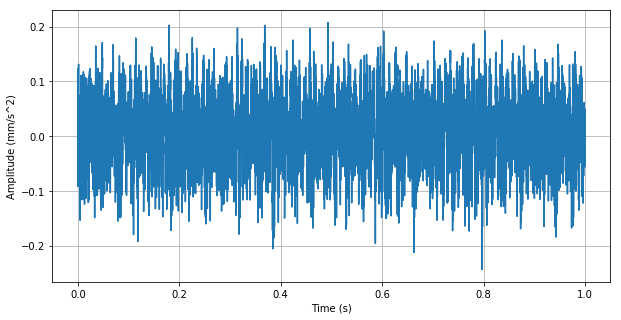

In [26]:
# Sample signal
sample_signal = normal_x_train.iloc[0,:]
time = np.linspace(0, 1, 12000)

# plot rsa
plt.figure(figsize = (10,5))
plt.plot(time, sample_signal)
#plt.title('Sample Signal')
plt.ylabel('Amplitude (mm/s^2)')
plt.xlabel('Time (s)')
plt.grid()

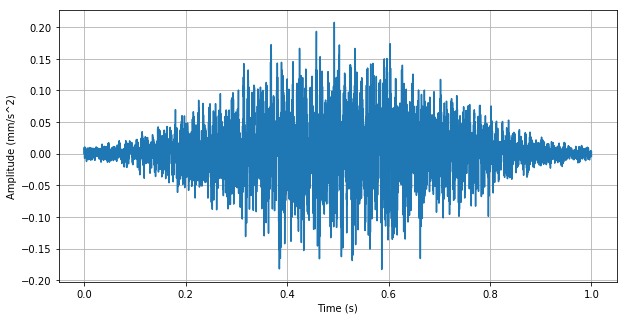

In [27]:
# Sample signal
sample_signal = normal_x_train.iloc[0,:]*np.hamming(12000)
time = np.linspace(0, 1, 12000)

# plot rsa
plt.figure(figsize = (10,5))
plt.plot(time, sample_signal)
#plt.title('Sample Signal')
plt.ylabel('Amplitude (mm/s^2)')
plt.xlabel('Time (s)')
plt.grid()

In [13]:
#Standardization
normal_x_train_scaled = pd.DataFrame(scale(normal_x_train, axis = 1))
normal_x_test_scaled = pd.DataFrame(scale(normal_x_test, axis = 1))

abnormal_x_train_scaled = pd.DataFrame(scale(abnormal_x_train, axis = 1))
abnormal_x_test_scaled = pd.DataFrame(scale(abnormal_x_test, axis = 1))

'''
#No-Standardization
normal_x_train_scaled = normal_x_train
normal_x_test_scaled = normal_x_test

abnormal_x_train_scaled = abnormal_x_train
abnormal_x_test_scaled = abnormal_x_test
'''

'\n#No-Standardization\nnormal_x_train_scaled = normal_x_train\nnormal_x_test_scaled = normal_x_test\n\nabnormal_x_train_scaled = abnormal_x_train\nabnormal_x_test_scaled = abnormal_x_test\n'

In [14]:
normal_x_train_scaled.to_csv('normal_x_train_scaled.csv')

In [15]:
#Hamming and FFT
normal_x_train_fft = np.apply_along_axis(do_FFT, 1, normal_x_train_scaled)
normal_x_test_fft = np.apply_along_axis(do_FFT, 1, normal_x_test_scaled)

abnormal_x_train_fft = np.apply_along_axis(do_FFT, 1, abnormal_x_train_scaled)
abnormal_x_test_fft = np.apply_along_axis(do_FFT, 1, abnormal_x_test_scaled)

Text(0,0.5,'|Y(freq)|')

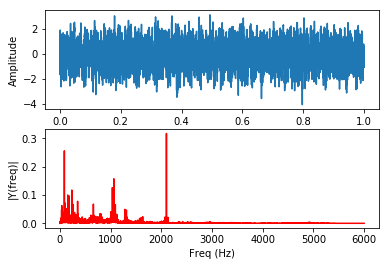

In [16]:
Fs = 12000.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector

y = normal_x_train_scaled.iloc[0,:]

n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(n/2)] # one side frequency range

Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(n/2)]

fig, ax = plt.subplots(2, 1)
ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')


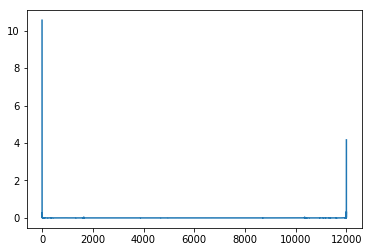

In [17]:
#Cepstrum
normal_x_train_cep = np.apply_along_axis(do_Cepstrum, 1, normal_x_train_fft)
normal_x_test_cep = np.apply_along_axis(do_Cepstrum, 1, normal_x_test_fft)

abnormal_x_train_cep = np.apply_along_axis(do_Cepstrum, 1, abnormal_x_train_fft)
abnormal_x_test_cep = np.apply_along_axis(do_Cepstrum, 1, abnormal_x_test_fft)

plt.plot(normal_x_train_cep[0])

In [18]:
#SI Functions
def get_mean(x):
    avg = np.mean(x)
    return(avg)

def get_std(x):
    std = np.std(x)
    return(std)

def get_skewness(x):
    skewness = sum((x - np.mean(x))**3) / ((len(x)-1)*(np.std(x)**3))
    return(skewness)

def get_kurtosis(x):
    kurtosis = sum((x - np.mean(x))**4) / ((len(x)-1)*(np.std(x)**4))
    return (kurtosis)

def get_p2p(x):
    p2p = (np.max(x) - np.min(x))
    return(p2p)

def get_rms(x):
    rms = np.sqrt(sum(x**2) / len(x))
    return(rms)

def get_crestFactor(x):
    crestFactor = get_p2p(x) / get_rms(x)
    return(crestFactor)

def get_shapeFactor(x):
    shapeFactor = get_rms(x) / get_mean(x)
    return(shapeFactor)
    
def get_marginFactor(x):
    marginFactor = np.max(x) / (np.mean((np.sqrt(abs(x))))**2)
    return(marginFactor)

def get_impulseFactor(x):
    impulseFactor = np.max(x) / np.mean(abs(x))
    return(impulseFactor)


In [19]:
def make_df(x):
    mean_value = np.apply_along_axis(get_mean, 1, x)
    std_value = np.apply_along_axis(get_std, 1, x)
    skewness_value = np.apply_along_axis(get_skewness, 1, x)
    kurtosis_value = np.apply_along_axis(get_kurtosis, 1, x)
    p2p_value = np.apply_along_axis(get_p2p, 1, x)
    rms_value = np.apply_along_axis(get_rms, 1, x)
    crestFactor_value = np.apply_along_axis(get_crestFactor, 1, x)
    shapeFactor_value = np.apply_along_axis(get_shapeFactor, 1, x)
    marginFactor_value = np.apply_along_axis(get_marginFactor, 1, x)
    impulseFactor_value = np.apply_along_axis(get_impulseFactor, 1, x)
    
    df = pd.DataFrame({'mean':mean_value, 'std':std_value, 'skewness':skewness_value, 'kurtosis':kurtosis_value, 'p2p':p2p_value, 'rms':rms_value,
                       'crest':crestFactor_value, 'shape':shapeFactor_value, 'margin':marginFactor_value, 'impulse':impulseFactor_value})
    
    return(df)

In [20]:
#make dataframe
normal_x_train_SI = make_df(normal_x_train_cep)
normal_x_test_SI = make_df(normal_x_test_cep)

abnormal_x_train_SI = make_df(abnormal_x_train_cep)
abnormal_x_test_SI = make_df(abnormal_x_test_cep)

In [25]:
normal_x_train_SI_scaled.to_csv('normal_x_train_SI_scaled.csv')

In [21]:
#Standardization in MTS
def standardize(x,y):
    mean_mean = get_mean(x['mean'])
    std_mean = get_mean(x['std'])
    skewness_mean = get_mean(x['skewness'])
    kurtosis_mean = get_mean(x['kurtosis'])
    p2p_mean = get_mean(x['p2p'])
    rms_mean = get_mean(x['rms'])
    crest_mean = get_mean(x['crest'])
    shape_mean = get_mean(x['shape'])
    margin_mean = get_mean(x['margin'])
    impulse_mean = get_mean(x['impulse'])
    
    mean_std = get_std(x['mean'])
    std_std = get_std(x['std'])
    skewness_std = get_std(x['skewness'])
    kurtosis_std = get_std(x['kurtosis'])
    p2p_std = get_std(x['p2p'])
    rms_std = get_std(x['rms'])
    crest_std = get_std(x['crest'])
    shape_std = get_std(x['shape'])
    margin_std = get_std(x['margin'])
    impulse_std = get_std(x['impulse'])
    
    mean_value = (y['mean'] - mean_mean) / mean_std
    std_value = (y['std'] - std_mean) / std_std
    skewness_value = (y['skewness'] - skewness_mean) / skewness_std
    kurtosis_value = (y['kurtosis'] - kurtosis_mean) / kurtosis_std
    p2p_value = (y['p2p'] - p2p_mean) / p2p_std
    rms_value = (y['rms'] - rms_mean) / rms_std
    crest_value = (y['crest'] - crest_mean) / crest_std
    shape_value = (y['shape'] - shape_mean) / shape_std
    margin_value = (y['margin'] - margin_mean) / margin_std
    impulse_value = (y['impulse'] - impulse_mean) / impulse_std
    
    df = pd.DataFrame({'mean':mean_value, 'std':std_value, 'skewness':skewness_value, 'kurtosis':kurtosis_value, 'p2p':p2p_value, 'rms':rms_value,
                       'crest':crest_value, 'shape':shape_value, 'margin':margin_value, 'impulse':impulse_value})
    
    return(df)

In [22]:
normal_x_train_SI_scaled = standardize(normal_x_train_SI, normal_x_train_SI)
normal_x_test_SI_scaled = standardize(normal_x_train_SI, normal_x_test_SI)

abnormal_x_train_SI_scaled = standardize(normal_x_train_SI, abnormal_x_train_SI)
abnormal_x_test_SI_scaled = standardize(normal_x_train_SI, abnormal_x_test_SI)

In [29]:
def get_MD_distance(x):
    normal_cov_mat = pd.DataFrame(normal_x_train_SI_scaled).corr()
    dist = np.matmul(np.matmul(x, inv(normal_cov_mat)), np.transpose(x)) / len(x)
    return(dist)

In [30]:
#testdf[1].to_csv('normal_cov_mat.csv')

In [31]:
normal_train_dist = np.apply_along_axis(get_MD_distance, 1, normal_x_train_SI_scaled)
normal_test_dist = np.apply_along_axis(get_MD_distance, 1, normal_x_test_SI_scaled)

abnormal_train_dist = np.apply_along_axis(get_MD_distance, 1, abnormal_x_train_SI_scaled)
abnormal_test_dist = np.apply_along_axis(get_MD_distance, 1, abnormal_x_test_SI_scaled)


In [52]:
print(normal_train_dist)
print('\n')
print(normal_test_dist)
print('\n')
print(abnormal_train_dist)
print('\n')
print(abnormal_test_dist)


[1.99370882 0.48113691 1.89640015 1.52555421 2.00543967 1.29308915
 0.77553797 1.00222526 0.30119463 1.26762055 1.05787534 0.56470721
 0.60508689 0.45200172 0.80917936 0.33481299 0.64763959 1.21243245
 0.32178836 1.86603079 0.5753051  0.43175347 0.68175933 0.34227458
 1.70570715 0.43226766 0.72592225 2.34926966 1.86046452 0.48944318]


[1.27581521 3.28199883 0.9004412  4.68445915 1.67557092 2.7338898
 2.37610312 1.14581361 0.67727358 0.89394465]


[2.74819704e+05 3.54114676e+04 4.96970052e+05 2.76724872e+04
 3.19166934e+04 2.44613496e+04 1.98884274e+04 2.25771297e+04
 1.14112269e+05 2.01315098e+05 1.05339203e+04 2.05898020e+04
 9.89025958e+04 1.60807766e+05 3.48467980e+04 2.63026732e+05
 6.80975584e+05 5.12614863e+04 1.37044738e+05 1.69354957e+03
 1.72801889e+04 2.75297104e+04 3.14768268e+04 4.15300444e+04
 1.72788528e+04 2.98645345e+04 7.50787483e+05 3.24467562e+04
 3.84852583e+05 1.87557617e+05 3.44005548e+04 4.21809107e+03
 2.47751303e+04 1.69151304e+05 1.36412607e+04 1.45493691e+05

In [34]:
pd.DataFrame(normal_train_dist).to_csv('normal_train_dist.csv')

In [35]:
#L_12(2^11) orthogonal array
ortho_array = np.matrix([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                       [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
                       [1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2],
                       [1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2],
                       [1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1],
                       [1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1],
                       [2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1],
                       [2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2],
                       [2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1],
                       [2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2],
                       [2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2],
                       [2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1]])

In [36]:
otho_df = pd.DataFrame(ortho_array, columns=['mean', 'std', 'skewness', 'kurtosis', 'p2p', 'rms', 'crest', 'shape', 'margin', 'impulse','DUMMY'])

In [37]:
def get_exp_col(n):
    condition = otho_df.iloc[n,:]==1
    col = list(otho_df.loc[n,condition].index)
    if('DUMMY' in col):
        col.pop()
    return(col)

In [38]:
def get_MD_distance_exp(x,n):
    col = get_exp_col(n)
    normal_cov_mat = pd.DataFrame(normal_x_train_SI_scaled[col]).corr()
    dist = np.matmul(np.matmul(x, inv(normal_cov_mat)), np.transpose(x)) / len(x)
    return(dist)

In [39]:
def get_MD_exp(n,df):
    col = get_exp_col(n)
    target_df = df[col]
    dist = np.apply_along_axis(get_MD_distance_exp, 1, target_df, n)
    return(dist)

In [40]:
def get_MD_matrix(df):
    arr = np.empty([12, df.shape[0]])
    for i in range(0,12):
        arr[i,:] = get_MD_exp(i,df)
        
    return(arr)

In [41]:
normal_x_test_MD_matrix = get_MD_matrix(normal_x_test_SI_scaled)

abnormal_x_train_MD_matrix = get_MD_matrix(abnormal_x_train_SI_scaled)
abnormal_x_test_MD_matrix = get_MD_matrix(abnormal_x_test_SI_scaled)


In [42]:
def cal_larger_better_SNRatio(mat):
    SNRatio = []
    for i in range(0,mat.shape[0]):
        dist = mat[i]
        SN = -10 * np.log10(np.mean(1/(dist)))
        SNRatio.append(SN)
        
    return(SNRatio)

In [43]:
def cal_smaller_better_SNRatio(mat):
    SNRatio = []
    for i in range(0,mat.shape[0]):
        dist = mat[i]
        SN = -10 * np.log10(np.mean(dist))
        SNRatio.append(SN)
        
    return(SNRatio)

In [44]:
SNRatio_normal_test = cal_smaller_better_SNRatio(normal_x_test_MD_matrix)

SNRatio_abnormal_train = cal_larger_better_SNRatio(abnormal_x_train_MD_matrix)
SNRatio_abnormal_test = cal_larger_better_SNRatio(abnormal_x_test_MD_matrix)

In [45]:
def cal_smaller_better_gain(mat,col_name):
    idx_1 = list(otho_df.loc[otho_df[col_name] == 1].index)
    idx_2 = list(otho_df.loc[otho_df[col_name] == 2].index)
    
    SN = np.array(cal_smaller_better_SNRatio(mat))
    values_1 = np.mean(SN[idx_1])
    values_2 = np.mean(SN[idx_2])
    
    gain = values_1 - values_2
    
    return(gain)

In [46]:
def cal_larger_better_gain(mat,col_name):
    idx_1 = list(otho_df.loc[otho_df[col_name] == 1].index)
    idx_2 = list(otho_df.loc[otho_df[col_name] == 2].index)
    
    SN = np.array(cal_larger_better_SNRatio(mat))
    values_1 = np.mean(SN[idx_1])
    values_2 = np.mean(SN[idx_2])
    
    gain = values_1 - values_2
    
    return(gain)

In [47]:
#get gain
column_names=['mean', 'std', 'skewness', 'kurtosis', 'p2p', 'rms', 'crest', 'shape', 'margin', 'impulse']

def get_normal_test_gain(col):
    columns = col
    gain_values = []
    for i in range(0,len(columns)):
        gain_values.append(cal_smaller_better_gain(normal_x_test_MD_matrix, columns[i]))
        
    return(gain_values)
 
def get_abnormal_train_gain(col):
    columns = col
    gain_values = []
    for i in range(0,len(columns)):
        gain_values.append(cal_larger_better_gain(abnormal_x_train_MD_matrix, columns[i]))
        
    return(gain_values)

def get_abnormal_test_gain(col):
    columns = col
    gain_values = []
    for i in range(0,len(columns)):
        gain_values.append(cal_larger_better_gain(abnormal_x_test_MD_matrix, columns[i]))
        
    return(gain_values)

In [48]:
normal_test_gain = get_normal_test_gain(column_names)

abnormal_train_gain = get_abnormal_train_gain(column_names)
abnormal_test_gain = get_abnormal_test_gain(column_names)

In [49]:
print('normal_test_gain')
print(pd.DataFrame(normal_test_gain, index=column_names))
print('\n')

print('abnormal_train_gain')
print(pd.DataFrame(abnormal_train_gain, index=column_names))
print('\n')

print('abnormal_test_gain')
print(pd.DataFrame(abnormal_test_gain, index=column_names))

normal_test_gain
                 0
mean     -0.481293
std      -0.311759
skewness  0.079479
kurtosis -0.122072
p2p       0.008835
rms      -0.428197
crest    -1.009785
shape    -0.432587
margin   -0.308295
impulse  -0.383280


abnormal_train_gain
                 0
mean      4.281177
std       0.085119
skewness  2.236284
kurtosis  2.117121
p2p       2.144980
rms       1.666637
crest     3.668830
shape     0.249173
margin   -0.259597
impulse   4.072467


abnormal_test_gain
                 0
mean      3.798336
std       0.372987
skewness  3.565668
kurtosis  2.139132
p2p       2.783413
rms       1.043960
crest     4.424669
shape     0.281101
margin    0.469947
impulse   4.843066


In [51]:
# Select variables that show positive SN ratio in Normal test
#'mean', 'std', 'skewness', 'kurtosis', 'p2p', 'rms', 'crest', 'shape', 'margin', 'impulse'

variables = ['skewness','p2p']

normal_train_taguchi = normal_x_train_SI_scaled[variables]
normal_test_taguchi = normal_x_test_SI_scaled[variables]

abnormal_train_taguchi = abnormal_x_train_SI_scaled[variables]
abnormal_test_taguchi = abnormal_x_test_SI_scaled[variables]

def get_MD_distance_taguchi(x):
    normal_cov_mat = pd.DataFrame(normal_train_taguchi).corr()
    dist = np.matmul(np.matmul(x, inv(normal_cov_mat)), np.transpose(x)) / len(x)
    return(dist)

normal_train_dist_taguchi = np.apply_along_axis(get_MD_distance_taguchi, 1, normal_train_taguchi)
normal_train_dist_taguchi.sort()
normal_test_dist_taguchi = np.apply_along_axis(get_MD_distance_taguchi, 1, normal_test_taguchi)
normal_test_dist_taguchi.sort()

abnormal_train_dist_taguchi = np.apply_along_axis(get_MD_distance_taguchi, 1, abnormal_train_taguchi)
abnormal_train_dist_taguchi.sort()
abnormal_test_dist_taguchi = np.apply_along_axis(get_MD_distance_taguchi, 1, abnormal_test_taguchi)
abnormal_test_dist_taguchi.sort()

# Results of Feature selection
print('Normal Train (Mahalanobis Space)')
print(normal_train_dist_taguchi)
print('\n')

print('Normal Test')
print(normal_test_dist_taguchi)
print('\n')

print('Abnormal Train')
print(abnormal_train_dist_taguchi)
print('\n')

print('Abnormal Test')
print(abnormal_test_dist_taguchi)

Normal Train (Mahalanobis Space)
[0.00654796 0.0077547  0.09886609 0.15662498 0.16138751 0.18032054
 0.20888895 0.24246398 0.25498061 0.36454925 0.38698137 0.46727654
 0.51902982 0.66334821 0.76580009 0.88756591 0.89438347 0.95481363
 1.03236315 1.07188036 1.18986179 1.29536843 1.47258861 1.5869728
 1.8014643  2.17569495 2.50584956 2.50915109 2.93127543 3.20594593]


Normal Test
[0.05585211 0.09788478 0.37706222 0.90840727 0.91148417 0.9534677
 1.09079742 1.37706905 2.12772026 2.60184539]


Abnormal Train
[  26.03609508   63.2413403    66.85390422   69.14298558   69.38256408
   70.97867885   74.04774766   81.27232463   83.3278519    83.43449999
   84.16565713   92.02397894   92.50844638   92.64042319   92.91222643
   98.56390215   98.82810128  103.83173083  109.21362766  118.86425381
  120.13356695  123.27470187  125.8828789   127.4766174   129.05239805
  129.24512838  159.17621738  164.7829943   165.69568126  165.86534961
  169.06530697  169.59323652  172.35159458  174.34125532  185.8